<a href="https://colab.research.google.com/github/vin-thomas/Enron_email_classification/blob/main/Enron_KMeans_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AIML Labs/@Project/working files 2b/enron_csv_3', index_col=[0])

In [ ]:
df

,from_id,to_id,cc_id,bcc_id,name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557
0,1515,11871,0,0,133,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.047821,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.039159,0.000000,0.049645,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.485553,0.0,0.25845,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,17492,15484,7047,6918,199,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.120024,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.055999,0.000000,...,0.0,0.0,0.000000,0.0,0.139966,0.0,0.0,0.023909,0.056581,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,1400,3009,0,0,182,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.081656,0.0,0.117593,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.094743,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.160380,0.000000,0.000000,0.083692,0.0,0.0,0.000000,0.017365,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.014219,0.000000,0.018027,0.070306,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.071827,0.0,0.0,0.0,0.117810,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.117986,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,124,92,0,0,0,0.0,0.2444,0.0,0.000000,0.0,0.0,0.0,0.203821,0.0,0.000000,0.0,0.0,0.0,0.000000,0.102742,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.030754,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.025183,0.000000,0.031927,0.124517,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.100139,0.000000,0.000000,0.126643,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,248,472,0,0,49,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.139147,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.027033,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.022136,0.000000,0.028064,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.157597,0.0,0.0,0.0,0.000000,0.107902,0.14971,0.0,0.0,0.000000,0.084373,0.000000,0.111321,0.182444,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2080,16913,0,0,221,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.109409,0.000000,0.000000,0.0,0.0,0.000000,0.021104,...,0.0,0.0,0.000000,0.0,0.142585,0.0,0.0,0.017282,0.000000,0.021909,0.120429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.123034,0.0,0.0,0.0,0.167511,0.118723,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.086907,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
29996,5828,5556,0,0,55,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.033737,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.027626,0.000000,0.035024,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


# perform a robust scaler transform of the dataset
ss = StandardScaler()
df = ss.fit_transform(df)
# convert the array back to a dataframe
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562
0,-0.480427,1.539133,-0.343179,-0.341479,0.234313,-0.238467,-0.238641,-0.174008,-0.166514,-0.172021,-0.18956,-0.230559,-0.249339,-0.264837,-0.180710,-0.188798,-0.254007,-0.185247,-0.393513,-0.164836,-0.245294,-0.246217,-0.214076,-0.185989,-0.174246,-0.182796,-0.170057,-0.179505,-0.211659,-0.322874,-0.182859,-0.289967,-0.220291,-0.20622,-0.212654,-0.238668,-0.195852,-0.171788,-0.486363,0.435318,...,-0.212552,-0.184246,-0.170766,-0.177007,-0.245596,-0.175553,-0.195092,0.230748,-0.479089,0.460763,-0.339498,-0.202277,-0.19306,-0.182717,-0.231073,-0.169062,-0.180401,9.556995,-0.194757,5.265809,-0.316519,-0.189054,-0.25649,-0.202005,-0.242780,-0.340820,-0.175029,-0.181215,-0.180239,-0.170630,-0.197396,-0.231824,-0.319402,-0.242398,-0.194265,-0.306424,-0.292475,-0.206627,-0.171235,-0.190617
1,2.776800,2.258239,5.150090,5.172769,1.233037,-0.238467,-0.238641,-0.174008,-0.166514,-0.172021,-0.18956,-0.230559,-0.249339,-0.264837,-0.180710,-0.188798,-0.254007,-0.185247,-0.393513,-0.164836,-0.245294,-0.246217,-0.214076,-0.185989,-0.174246,-0.182796,-0.170057,-0.179505,-0.211659,1.903059,-0.182859,-0.289967,-0.220291,-0.20622,-0.212654,-0.238668,-0.195852,-0.171788,1.267130,-1.117552,...,-0.212552,-0.184246,-0.170766,-0.177007,3.315656,-0.175553,-0.195092,-0.470166,1.281909,-1.064563,-0.339498,-0.202277,-0.19306,-0.182717,-0.231073,-0.169062,-0.180401,-0.195651,-0.194757,-0.189336,-0.316519,-0.189054,-0.25649,-0.202005,-0.242780,-0.340820,-0.175029,-0.181215,-0.180239,-0.170630,-0.197396,-0.231824,-0.319402,-0.242398,-0.194265,-0.306424,-0.292475,-0.206627,-0.171235,-0.190617
2,-0.503872,-0.224695,-0.343179,-0.341479,0.975790,-0.238467,-0.238641,-0.174008,-0.166514,-0.172021,-0.18956,-0.230559,1.720500,-0.264837,3.996811,-0.188798,-0.254007,-0.185247,-0.393513,-0.164836,-0.245294,-0.246217,-0.214076,-0.185989,-0.174246,2.285761,-0.170057,-0.179505,-0.211659,-0.322874,-0.182859,-0.289967,4.764432,-0.20622,-0.212654,2.007486,-0.195852,-0.171788,-0.486363,-0.553678,...,-0.212552,-0.184246,-0.170766,-0.177007,-0.245596,-0.175553,-0.195092,-0.915535,-0.479089,-0.510691,1.321589,-0.202277,-0.19306,-0.182717,-0.231073,-0.169062,-0.180401,-0.195651,-0.194757,-0.189336,1.223675,-0.189054,-0.25649,-0.202005,2.776066,-0.340820,-0.175029,-0.181215,-0.180239,-0.170630,-0.197396,2.547599,-0.319402,-0.242398,-0.194265,-0.306424,-0.292475,-0.206627,-0.171235,-0.190617
3,-0.764009,-0.805274,-0.343179,-0.341479,-1.778268,-0.238467,5.510086,-0.174008,-0.166514,-0.172021,-0.18956,-0.230559,4.667604,-0.264837,-0.180710,-0.188798,-0.254007,-0.185247,-0.393513,3.469153,-0.245294,-0.246217,-0.214076,-0.185989,-0.174246,-0.182796,-0.170057,-0.179505,-0.211659,-0.322874,-0.182859,-0.289967,-0.220291,-0.20622,-0.212654,-0.238668,-0.195852,-0.171788,-0.486363,-0.118894,...,-0.212552,-0.184246,-0.170766,-0.177007,-0.245596,-0.175553,-0.195092,-0.411604,-0.479089,-0.083619,2.602399,-0.202277,-0.19306,-0.182717,-0.231073,-0.169062,-0.180401,-0.195651,-0.194757,-0.189336,-0.316519,-0.189054,-0.25649,-0.202005,-0.242780,-0.340820,-0.175029,-0.181215,-0.180239,2.667061,-0.197396,-0.231824,2.382747,-0.242398,-0.194265,-0.306424,-0.292475,-0.206627,-0.171235,-0.190617
4,-0.738730,-0.729642,-0.343179,-0.341479,-1.036791,-0.238467,-0.238641,-0.174008,-0.166514,-0.172021,-0.18956,-0.230559,-0.249339,-0.264837,-0.180710,-0.188798,-0.254007,-0.185247,-0.393513,-0.164836,-0.245294,-0.246217,-0.214076,-0.185989,-0.174246,-0.182796,-0.170057,-0.179505,3.671970,-0.322874,-0.182859,-0.289967,-0.220291,-0.20622,-0.212654,-0.238668,-0.195852,-0.171788,-0.486363,-0.239717,...,-0.212552,-0.184246,-0.170766,-0.177007,-0.245596,-0.175553,-0.195092,-0.551642,-0.479089,-0.202299,-0.339498,-0.202277,-0.19306,-0.182717,-0.2310

In [ ]:
# Elbow method

wss = []

for k in range (1, 30):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(df)
    wss.append(kmeans.inertia_)

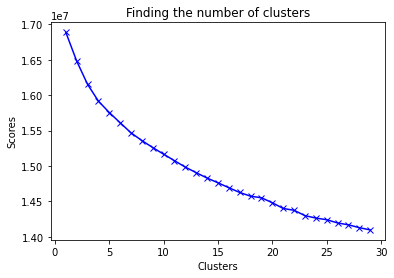

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the inertia
plt.plot(range (1, 30), wss, 'bx-')
plt.title('Finding the number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [ ]:
import sklearn.metrics as metrics

for i in range(3,30):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.015569615668704568
Silhouette score for k(clusters) = 4 is 0.02032219716219225
Silhouette score for k(clusters) = 5 is 0.0180195606256362
Silhouette score for k(clusters) = 6 is 0.014177021648771165
Silhouette score for k(clusters) = 7 is 0.015630579225273125
Silhouette score for k(clusters) = 8 is 0.015410116010149785
Silhouette score for k(clusters) = 9 is 0.017029096546445507
Silhouette score for k(clusters) = 10 is 0.018982643876006105
Silhouette score for k(clusters) = 11 is 0.0119024587286384
Silhouette score for k(clusters) = 12 is 0.016431126866780475
Silhouette score for k(clusters) = 13 is 0.0191304509679318
Silhouette score for k(clusters) = 14 is 0.0176932186385897
Silhouette score for k(clusters) = 15 is 0.016707959123539156
Silhouette score for k(clusters) = 16 is 0.01691052267249806
Silhouette score for k(clusters) = 17 is 0.02077744472892476
Silhouette score for k(clusters) = 18 is 0.02090231355609485
Silhouette score for k(clus

In [ ]:
p=23
kmeans= KMeans (n_clusters= p, random_state=5)
kmeans.fit(df)
y_pred= kmeans.fit_predict(df)
centroids= kmeans.cluster_centers_
centroids.shape, df.shape

((23, 563), (30000, 563))

In [ ]:
import numpy as np
new_array= np.concatenate((df, centroids), axis=0)
new_pred= p*(np.ones((p,), dtype=int))
new_y_pred= np.concatenate((y_pred, new_pred), axis=0)
new_y_pred.shape, new_array.shape

((30023,), (30023, 563))

In [ ]:
m= TSNE(n_components=2, random_state=0)

features= m.fit_transform(new_array)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


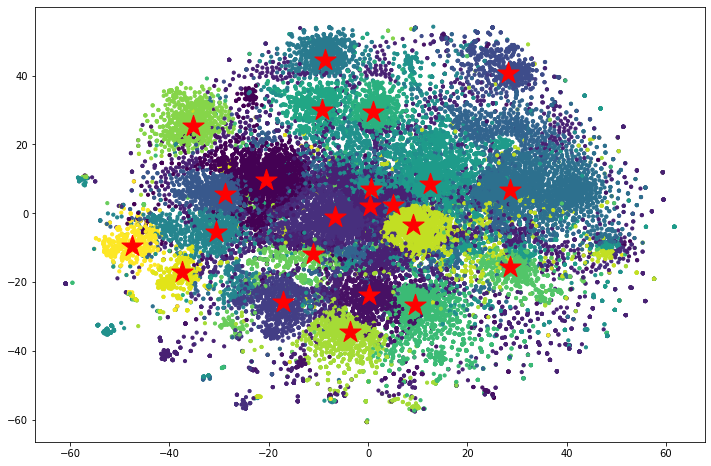

In [ ]:
plt.figure (figsize= (12,8))
plt.scatter(features[:30000, 0] , features[:30000 , 1] , c = new_y_pred[:30000], s=10)
plt.scatter(features[30000:, 0] , features[30000:, 1], marker='*', c='r', s=500)
plt.show()

In [ ]:
y_pred, type(y_pred)

(array([18,  7, 19, ..., 19,  2, 14], dtype=int32), numpy.ndarray)

In [ ]:
np.unique(y_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int32)